In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_nodes_from("ABCDEFGHIJKLMNPQRST")

In [3]:
G.add_edges_from([("A","C"),("B","C"),("B","E"),("C","D"),("C","F"),("D","F"),("E","G"),("E","F"),("F","J"),("F","L"),("F","H"),("G","I"),("G","J"),("H","K")])
G.add_edges_from([("L","M"),("L","P"),("L","N"),("N","P"),("P","R"),("P","Q"),("Q","S"),("S","T")])

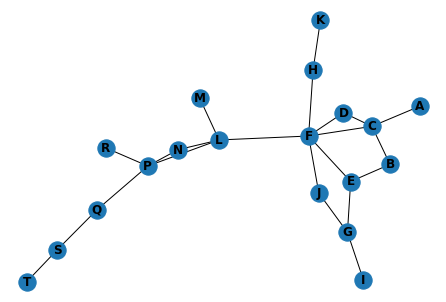

In [4]:
nx.draw(G, with_labels=True, font_weight='bold')

In [5]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T'))

In [6]:
# The Bounding Diameters Algorithm
import math
V= G.nodes()
W=V
delta_L= -math.inf
delta_U= + math.inf

In [7]:
dict_L = dict.fromkeys(W)
dict_U = dict.fromkeys(W)

In [8]:
from networkx.algorithms.distance_measures import eccentricity 
dict_ecc=eccentricity(G)

In [9]:
from networkx.algorithms.distance_measures import diameter
dict_D=diameter(G)

In [10]:
deg_G=G.degree()
dict_deg=dict.fromkeys(W)
# for deg in (deg_G):
for w in W:
    dict_deg[w]=deg_G[w]

In [11]:
for w in W:
    dict_L[w]=-math.inf
    dict_U[w]=math.inf 

In [12]:
flag = 1000 # if flag ==1, then the upper bound is selected. Else if flag == -1, then  the lower bound is selected. If flag==1000, 
#  then it is in initial situation.


In [13]:
def selectFrom(W, flag):
    if (flag == 1000):
        node_s=max(dict_deg, key=dict_deg.get) # get the node with largest degree
        flag = 1
    elif (flag ==1): # select the node with largest upper bound value if flag==1
        node_s= max(dict_U,key=dict_U.get)
        flag=-flag
    elif(flag ==-1): # select the node with smallest lower bound value if flag==-1
        node_s= min(dict_L,key=dict_L.get)
        flag = -flag
    return node_s,flag
        

In [14]:
from networkx.algorithms.shortest_paths.generic import all_shortest_paths
def dist_nodes(v,w):
    sh_path_vw=[i for i in all_shortest_paths(G,v,w)][0] # get the shortest path between two nodes in G.
    len_sh_path_vw= len(sh_path_vw)
    return len_sh_path_vw

In [15]:
times=0
while ((delta_L is not delta_U) and (W is not None)):
    v,flag=selectFrom(W,flag)
    delta_L = max(delta_L, dict_ecc[v])
    delta_U = min(delta_U, 2*dict_ecc[v])
    for w in W:
        dict_L[w]=max(dict_L[w],max((dict_ecc[v]-dist_nodes(v,w)),dist_nodes(v,w)))
        dict_U[w]=min(dict_U[w],dict_ecc[v]+dist_nodes(v,w))
        if ( (dict_U[w]<= delta_L) and (dict_L[w]>= delta_U/2) ) or (dict_L[w] == dict_U[w]):
            W= W-{w}
    times+=1

In [16]:
print("The diamter value of lower bounds is: ", delta_L)
print("The diamter value of upper bounds is: ", delta_U)
print("The iteration times are: ",times)

The diamter value of lower bounds is:  8
The diamter value of upper bounds is:  8
The iteration times are:  5


The time complexity of the naive mthod to calculate diamter is O(mn) for sparse unweighted graphs (with n vertices and m edges).